# Examples

In [1]:
from sympy.abc import *
from sympy import *
from sympy.stats import *

## Basic Examples

In [5]:
n,p=symbols("n p")
density(Binomial("X",n,p))(x)

Piecewise((p**x*(1 - p)**(n - x)*binomial(n, x), Contains(x, Integers) & (n >= x) & (x >= 0)), (0, True))

In [24]:
n=symbols("n",integer=True)
p=symbols("p")
cdf(Binomial("X",n,p))(x).simplify()

Sum(Piecewise((p**_ki*(1 - p)**(-_ki)*(1 - p)**n*binomial(n, _ki), (_ki >= 0) & (_ki <= n)), (0, True)), (_ki, 0, x))

Mean and variance of a binomial distribution:

In [25]:
E(Binomial("X",n,p)).simplify()

Sum(Piecewise((_k*p**_k*(1 - p)**(-_k)*(1 - p)**n*binomial(n, _k), (_k >= 0) & (_k <= n)), (0, True)), (_k, 0, n))

In [26]:
variance(Binomial("X",n,p)).simplify()

Sum(Piecewise((p**_k*(1 - p)**(-_k)*(1 - p)**n*(_k**2 - 2*_k*Sum(Piecewise((_k*p**_k*(1 - p)**(-_k)*(1 - p)**n*binomial(n, _k), (_k >= 0) & (_k <= n)), (0, True)), (_k, 0, n)) + Sum(Piecewise((_k*p**_k*(1 - p)**(-_k)*(1 - p)**n*binomial(n, _k), (_k >= 0) & (_k <= n)), (0, True)), (_k, 0, n))**2)*binomial(n, _k), (_k >= 0) & (_k <= n)), (0, True)), (_k, 0, n))

## Scope

In [27]:
P(
    Eq(
        Binomial("X",3,Rational(3,4)),2
    )
)

27/64

In [28]:
P(
    Eq(
        Binomial("X",3,Rational(3,4)),2
    )
)*P(
    Eq(
        Binomial("X",3,Rational(3,4)),0
    )
)

27/4096

In [29]:
E( Binomial("X",n,Rational(3,4))).simplify()

Sum(Piecewise((3**_k*4**(-n)*_k*binomial(n, _k), (_k >= 0) & (_k <= n)), (0, True)), (_k, 0, n))

In [31]:
E( Binomial("X",3,Rational(3,10)))

9/10

In [33]:
P( Binomial("X",4,Rational(3,10))>=3)

837/10000

In [34]:
E( Binomial("X",500,Rational(3,10)))

150

In [39]:
P(
    And(
        60<=Binomial("X",100,Rational(1,2)),
        Binomial("X",100,Rational(1,2)) <=80
        )
)

18028505720779282715431630437/633825300114114700748351602688

In [40]:
P(
    And(
        60<=Binomial("X",100,Rational(3,5)),
        Binomial("X",100,Rational(3,5)) <=80
        )
)

4285791403871183827199031118015103621198743893118136090089003130290176/7888609052210118054117285652827862296732064351090230047702789306640625

A machine produces parts, with 1 in 10 defective:

In [41]:
P(
        Binomial("X",5,Rational(1,10)) <=1      
)

45927/50000

An airplane engine fails with probability p; compute the probability that no more than 2 of 4 fail:

In [46]:
prob1=P(
    Binomial("X",4,p) <=2    
).simplify()
prob1

3*p**4 - 4*p**3 + 1

In [47]:
prob2=P(
    Binomial("X",2,p) <=1    
).simplify()
prob2

1 - p**2

In [60]:
solveset(
    prob1>prob2,symbol=p,domain=Interval.open(0,1)
    )

Interval.open(0, 1/3)

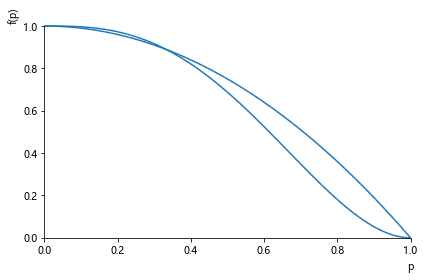

In [62]:
plot(prob1,prob2,(p,0,1))

A system uses triple redundancy with three microprocessors and is designed to operate as long as one processor is still functional. The probability that a microprocessor is still functional after  seconds is . Find the probability that the system is still operating after  seconds:

In [66]:
λ,t =symbols("λ t")
P(
    Binomial("X",3,exp(-λ *t )) >=1   
).simplify()

(3*exp(2*t*λ) - 3*exp(t*λ) + 1)*exp(-3*t*λ)

In [78]:
λ=Rational(1,10**8)
solveset(
    1- ( 1- exp(-t*λ))**3  <=Rational(99,100),
    t,
    domain=S.Reals
)

Interval(-100000000*log(1 - 10**(1/3)/10), oo)

Gary Kasparov, chess champion, plays in a tournament simultaneously against 100 amateurs. It has been estimated that he loses about 1% of such games. Find the probability of losing 0, 2, 5, and 10 games:

In [79]:
k=symbols("k")
Array(
    P(
        Eq(
            Binomial("X",100,Rational(1,100)),k
            )
    ) for k in [0,2,5,10]
)

[36603234127322950493061602657251738618971207663892369140595737269931704475072474818719654351002695040066156910065284327471823569680179941585710535449170757427389035006098270837114978219916760849490001/100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000, 369729637649726772657187905628805440595668764281741102430259972423552570455277523421410650010128232727940978889548326540119429996769494359451621570193644014418071060667659301384999779999159200499899/2000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000, 181111695235092620979678853163170554555988786614344182551051340764975061024893776951430932063017635816990790742031394038867158553667004365713409714235549042153922837326781194197139639877605117595

In [80]:
k=symbols("k")
Array(
    P(
        Eq(
            Poisson("X",1),k
            )
    ) for k in [0,2,5,10]
)

[exp(-1), exp(-1)/2, exp(-1)/120, exp(-1)/3628800]

In [81]:
k=symbols("k")
Array(
    P(
        Eq(
            Binomial("X",5,Rational(1,10)),k
            )
    ) for k in [0,2,5,10]
)

[59049/100000, 729/10000, 1/100000, 0]

In [82]:
k=symbols("k")
Array(
    P(
        Eq(
            Poisson("X",Rational(1,2)),k
            )
    ) for k in [0,2,5,10]
)

[exp(-1/2), exp(-1/2)/8, exp(-1/2)/3840, exp(-1/2)/3715891200]

A packet consisting of a string of n symbols is transmitted over a noisy channel. Each symbol has probability  of incorrect transmission. Find n such that the probability of incorrect packet transmission is less than :

In [85]:
P(
       Binomial(
           "X",
           n,
           Rational(1,10**4)
           )>=1
    )

NotImplementedError: Currently, probability queries are not supported for random variables with symbolic sized distributions.

In [87]:
P(
      Poisson(
           "X",
           n*Rational(1,10**4)
           )>=1
    ).simplify()

Sum(10000**(-n)*n**n*exp(-n/10000)/factorial(n), (n, 1, oo))

In [89]:
P(
      Binomial(
           "X",
           n,p
           )>=c
    ).simplify()

NotImplementedError: Currently, probability queries are not supported for random variables with symbolic sized distributions.

In [94]:
Array([
cdf(Binomial("X",100,Rational(1,10)))[19],
cdf(Binomial("X",100,Rational(1,10)))[20]
]
)

[4990107195671143843959764660313601220649966459287816421095806566315590037537253666574031544020746703/5000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000, 1248990532657042167381193865469395320718920736531468573219437243990862804777118750553147169910265047/1250000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000]

### Numerical Evaluation

### Specific Values

### Visualization

## Function Properties

### Differentiation

### Integration

### Series Expansions

### Integral Transforms

### Function Identities and Simplifications

### Function Representations

## Applications

## Properties & Relations

In [97]:
n1,n2=symbols("n_1 n_2")
Binomial("X",n1,p)+Binomial("Y",n2,p)

X + Y

## Possible Issues

## Neat Example

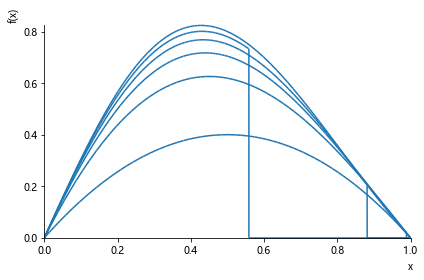

In [2]:
from sympy.abc import x,n,f,g,k
from sympy import *
from sympy.stats import E, Binomial
f = sin(pi*x)/(1+x**2)
f.subs(x, 2)
n, x = symbols("n x")
g = E(
    f.subs(x, Binomial("x", n, x)/n)
)
plot(
    f,
    *Array(g.subs(n, k) for k in [2, 5, 10, 20, 50]),
    (x, 0, 1)
)